In [3]:
import numpy as np
from numpy import pi,sqrt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
import time


import matplotlib.pyplot as plt

# Create simulator instances
backend_svec = AerSimulator(method='statevector')
backend_qasm = AerSimulator()

11.1 Steps 1 and 2

Mean Runtime for N=6 is 0.05827991485595703s
Standard Deviation of Runtimes for N=6 is 0.0019904795718873078
Mean Runtime for N=8 is 0.06323967933654785s
Standard Deviation of Runtimes for N=8 is 0.0034088325685917987
Mean Runtime for N=10 is 0.07096039772033691s
Standard Deviation of Runtimes for N=10 is 0.0061417755282130735


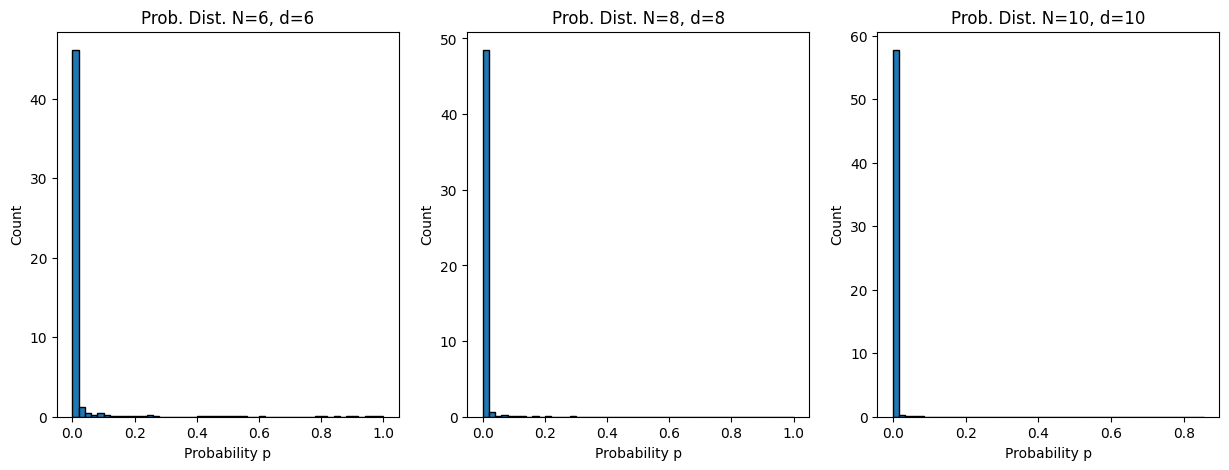

In [ ]:
arr = [6, 8, 10]
nShots = 2**15

all_probs = {}
runtime_stats = {}
for i, N in enumerate(arr):
    d = N
    probs_per_N = []
    times = []
    for _ in range(25):
        rand_circ = random_circuit(N, d, measure=True)

        # Somtimes this command errors out for some reason. Is transpilation necessary?
        transpiled_circuit = transpile(rand_circ, backend_qasm)

        start = time.time()
        result = backend_qasm.run(transpiled_circuit, shots=nShots).result()
        end = time.time()
        times.append(end - start)

        counts = result.get_counts()
        probs = [0] * (2 ** N)

        for bitstring, count in counts.items():
            idx = int(bitstring, 2)
            prob = count / nShots
            probs[idx] = prob

        probs_per_N.extend(probs)
    
    all_probs[N] = probs_per_N
    runtime_stats[N] = [np.mean(times), np.std(times)]


plt.figure(figsize=(15, 5))
for i, N in enumerate(arr):
    probs = all_probs[N]
    plt.subplot(1, 3, i+1)

    plt.hist(probs, bins=50, density=True, edgecolor='black')
    plt.title(f"Prob. Dist. N={N}, d={N}")
    plt.xlabel("Probability p")
    plt.ylabel("Count")


    # Useful stats to show how runtime for each circuit depends on N. stdev used to show how much
    # runtime varies from one circuit to the next at a fixed N
    print(f"Mean Runtime for N={N} is {runtime_stats[N][0]}s")
    print(f"Standard Deviation of Runtimes for N={N} is {runtime_stats[N][1]}")
    


plt.show()


# Maybe somehow also plot theoretical values although IDK where that comes from

11.1 Step 3

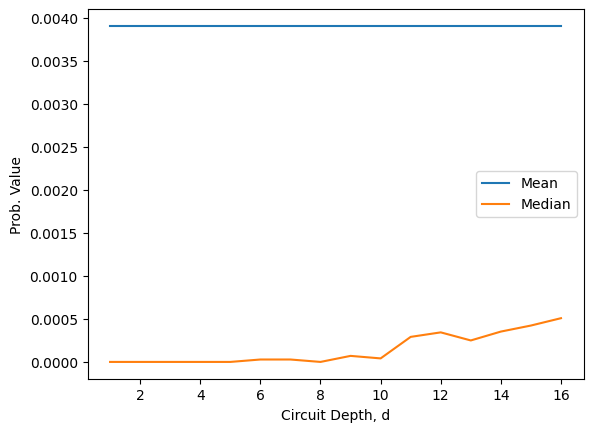

In [15]:
N = 8
arr = range(1, 2*N + 1)
nShots = 2**15

final_means = []
final_medians = []
for i, d in enumerate(arr):
    ckt_means = []
    ckt_medians = []
    
    for _ in range(25):
        rand_circ = random_circuit(N, d, measure=True)
        # Somtimes this command errors out for some reason. Is transpilation necessary? Optimization level 1 might fix
        # transpiled_circuit = transpile(rand_circ, backend_qasm)
        transpiled_circuit = transpile(rand_circ, backend_qasm, optimization_level=1)

        result = backend_qasm.run(transpiled_circuit, shots=nShots).result()

        counts = result.get_counts()
        probs = [0] * (2 ** N)

        for bitstring, count in counts.items():
            idx = int(bitstring, 2)
            prob = count / nShots
            probs[idx] = prob

        ckt_means.append(np.mean(probs))
        ckt_medians.append(np.median(probs))

    
    final_means.append(np.mean(ckt_means))
    final_medians.append(np.mean(ckt_medians))

plt.plot(arr, final_means, label = 'Mean')
plt.plot(arr, final_medians, label = 'Median')

plt.xlabel("Circuit Depth, d")
plt.ylabel("Prob. Value")
plt.legend()
plt.show()